# AAG01 - Part 1

**Short Description:** Deploy two functions to plot CDFs and PMFs from both discrete and continuous samples

In [25]:
# Creating some example data to be used

# number of samples in a given dataset http://monografias.ice.ufjf.br/tcc-web/tcc?id=540 (page 25)
discrete_data = [150, 178, 846, 5473, 214, 2310, 990, 100]
# height of some random people (in meters) 
continuous_data = [1.8, 1.78, 1.92, 1.69, 1.75]

In [26]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## CDF (Cumulative Distribution Function)

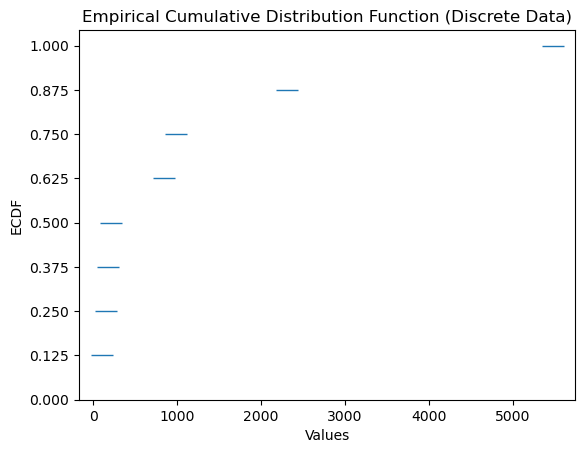

In [27]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = int(len(x))#.size
    y = np.arange(1, n+1) / n
    return(x,y)

# Generate CDF
x_std, y_std = ecdf(discrete_data)

# Plotting the ECDF
plt.plot(x_std, y_std, marker='_', linestyle='None', markersize=16)
plt.yticks(np.arange(0, max(y_std)+0.001, 1/len(discrete_data)))
plt.xlabel('Values')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (Discrete Data)')

plt.show()

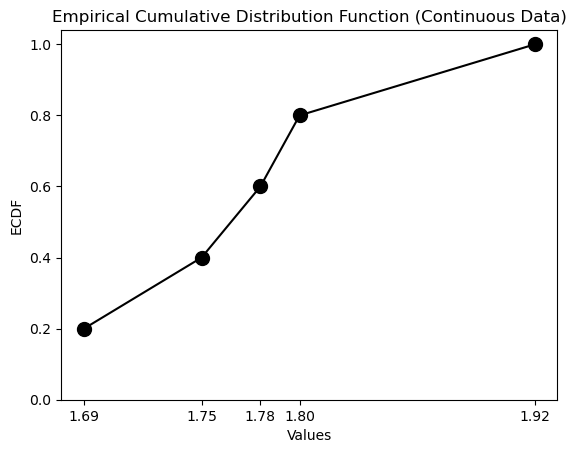

In [28]:
# Generate other CDF
x_std2, y_std2 = ecdf(continuous_data)

# Plotting the ECDF
plt.plot(x_std2, y_std2, marker='o', linestyle='-', color='black', markersize=10)
# plt.xticks(x_std2.pop(), x_std2)
plt.xticks(continuous_data)
plt.yticks(np.arange(0, max(y_std2)+0.001, 1/len(continuous_data)))
plt.xlabel('Values')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (Continuous Data)')

plt.show()